In [1]:
# ===============================================================
# 01_data_import.py
# T√©l√©chargement et sauvegarde des donn√©es du S&P 500 (Yahoo Finance)
# ===============================================================

import importlib.util
import sys
from pathlib import Path
import numpy as np
import pandas as pd

# --- V√©rification des d√©pendances ---
_required = ["yfinance", "pandas", "numpy", "matplotlib", "arch", "tensorflow"]
_missing = [pkg for pkg in _required if importlib.util.find_spec(pkg) is None]
if _missing:
    print(f"Installing missing packages: {', '.join(_missing)} ...")
    import subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", * _missing])

import yfinance as yf

# --- Configuration du t√©l√©chargement ---
ticker = "^GSPC"   # Indice S&P 500
start = "2010-01-01"
end = "2025-01-01"
interval = "1d"

# --- Pr√©parer le dossier de sortie ---
outdir = Path("data")
outdir.mkdir(parents=True, exist_ok=True)
outfile = outdir / "sp500_data.csv"

# --- T√©l√©chargement des donn√©es ---
try:
    data = yf.download(ticker, start=start, end=end, interval=interval,
                       progress=False, auto_adjust=True)
except Exception as e:
    sys.exit(f"Erreur lors du t√©l√©chargement : {e}")

# --- V√©rification du contenu ---
if data.empty:
    sys.exit("Aucune donn√©e t√©l√©charg√©e. V√©rifiez le ticker ou la connexion Internet.")

# --- Calcul des rendements logarithmiques ---
price_col = "Adj Close" if "Adj Close" in data.columns else "Close"
data["log_return"] = np.log(data[price_col] / data[price_col].shift(1))
data.dropna(inplace=True)

# --- Sauvegarde ---
data.to_csv(outfile)
print(data.head())
print(f"‚úÖ {len(data)} observations sauvegard√©es dans : {outfile}")



Installing missing packages: yfinance, arch, tensorflow ...
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 949.2/949.2 kB 46.0 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ï∫‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ  7/34 [werkzeug]

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ï∫‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18/34 [h5py]own]m]-data-server]

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ï∫‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24/34 [tensorboard]

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ï∫‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 29/34 [statsmodels]

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ï∏‚îÅ 33/34 [tensorflow]]

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 34/34 [tensorflow]4 [tensorflow]



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python -m pip install --upgrade pip


Price             Close         High          Low         Open      Volume  \
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC   
Date                                                                         
2010-01-05  1136.520020  1136.630005  1129.660034  1132.660034  2491020000   
2010-01-06  1137.140015  1139.189941  1133.949951  1135.709961  4972660000   
2010-01-07  1141.689941  1142.459961  1131.319946  1136.270020  5270680000   
2010-01-08  1144.979980  1145.390015  1136.219971  1140.520020  4389590000   
2010-01-11  1146.979980  1149.739990  1142.020020  1145.959961  4255780000   

Price      log_return  
Ticker                 
Date                   
2010-01-05   0.003111  
2010-01-06   0.000545  
2010-01-07   0.003993  
2010-01-08   0.002878  
2010-01-11   0.001745  
‚úÖ 3773 observations sauvegard√©es dans : data/sp500_data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Style graphique
plt.style.use("seaborn-v0_8")

# Charger le fichier CSV sauvegard√© √† l'√©tape 1
data = pd.read_csv("data/sp500_data.csv", index_col=0, parse_dates=True)

# V√©rifier le contenu
print(data.head())


                         Close                High                 Low  \
Price                                                                    
Ticker                   ^GSPC               ^GSPC               ^GSPC   
Date                       NaN                 NaN                 NaN   
2010-01-05    1136.52001953125  1136.6300048828125  1129.6600341796875   
2010-01-06  1137.1400146484375    1139.18994140625   1133.949951171875   
2010-01-07    1141.68994140625     1142.4599609375  1131.3199462890625   

                          Open      Volume  log_return  
Price                                                   
Ticker                   ^GSPC       ^GSPC         NaN  
Date                       NaN         NaN         NaN  
2010-01-05  1132.6600341796875  2491020000    0.003111  
2010-01-06     1135.7099609375  4972660000    0.000545  
2010-01-07    1136.27001953125  5270680000    0.003993  


/tmp/ipykernel_13607/3849724517.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv("data/sp500_data.csv", index_col=0, parse_dates=True)


In [3]:
# V√©rifier si la colonne 'log_return' existe
if "log_return" not in data.columns:
    price_col = "Adj Close" if "Adj Close" in data.columns else "Close"
    data["log_return"] = np.log(data[price_col] / data[price_col].shift(1))
    data.dropna(inplace=True)

print(data[["log_return"]].head())


            log_return
Price                 
Ticker             NaN
Date               NaN
2010-01-05    0.003111
2010-01-06    0.000545
2010-01-07    0.003993


In [7]:
# CELLULE 2 ‚Äî Calcul des rendements (log) si n√©cessaire
import numpy as np

# Choisir la colonne prix
price_col = "Adj Close" if "Adj Close" in data.columns else "Close"

# S'assurer que la colonne prix est num√©rique
data[price_col] = pd.to_numeric(data[price_col], errors="coerce")

# Calculer log return si absent ou pour recalcul propre
data["log_return"] = np.log(data[price_col] / data[price_col].shift(1))
data = data.dropna(subset=[price_col, "log_return"]).copy()

print("Nombre d'observations apr√®s nettoyage :", len(data))
display(data[[price_col, "log_return"]].head())


Nombre d'observations apr√®s nettoyage : 3772


Close  log_return
Price                              
2010-01-06  1137.140015    0.000545
2010-01-07  1141.689941    0.003993
2010-01-08  1144.979980    0.002878
2010-01-11  1146.979980    0.001745
2010-01-12  1136.219971   -0.009425

[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2010-01-04  1132.989990  1133.869995  1116.560059  1116.560059  3991400000
2010-01-05  1136.520020  1136.630005  1129.660034  1132.660034  2491020000
2010-01-06  1137.140015  1139.189941  1133.949951  1135.709961  4972660000
2010-01-07  1141.689941  1142.459961  1131.319946  1136.270020  5270680000
2010-01-08  1144.979980  1145.390015  1136.219971  1140.520020  4389590000


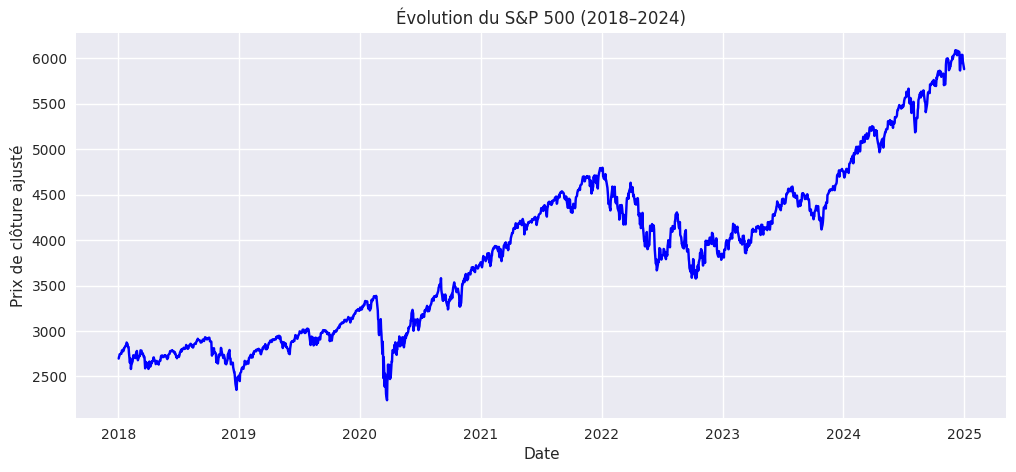

In [14]:
# Installer yfinance si ce n'est pas d√©j√† fait
# !pip install yfinance --quiet

import yfinance as yf
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")

# üîπ T√©l√©charger les donn√©es du S&P 500
# auto_adjust=True pour obtenir le prix ajust√© directement
sp500 = yf.download("^GSPC", start="2010-01-01", end="2025-01-01", auto_adjust=True)

# üîπ V√©rifier les premi√®res lignes pour voir les colonnes
print(sp500.head())

# üîπ Filtrer la p√©riode 2018-01-01 √† 2024-12-31
data_filtered = sp500.loc["2018-01-01":"2024-12-31"]

# üîπ Tracer le prix de cl√¥ture ajust√©
plt.figure(figsize=(12, 5))
plt.plot(data_filtered.index, data_filtered["Close"], color="blue")
plt.title("√âvolution du S&P 500 (2018‚Äì2024)")
plt.xlabel("Date")
plt.ylabel("Prix de cl√¥ture ajust√©")
plt.grid(True)
plt.show()


In [15]:
import numpy as np

# Calcul des rendements log quotidiens (%)
data_filtered['log_return'] = 100 * np.log(data_filtered['Close'] / data_filtered['Close'].shift(1))

# Supprimer la premi√®re valeur NaN
log_returns = data_filtered['log_return'].dropna()

# V√©rifier
print(log_returns.head())


Date
2018-01-03    0.637843
2018-01-04    0.402054
2018-01-05    0.700915
2018-01-08    0.166096
2018-01-09    0.130208
Name: log_return, dtype: float64


/tmp/ipykernel_13607/2740751993.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['log_return'] = 100 * np.log(data_filtered['Close'] / data_filtered['Close'].shift(1))


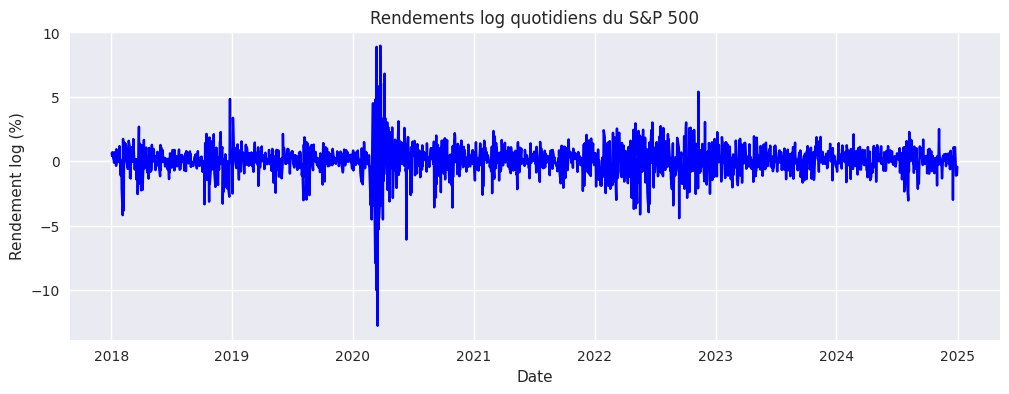

In [17]:
plt.figure(figsize=(12,4))
plt.plot(log_returns, color='blue')
plt.title("Rendements log quotidiens du S&P 500")
plt.xlabel("Date")
plt.ylabel("Rendement log (%)")
plt.grid(True)
plt.show()


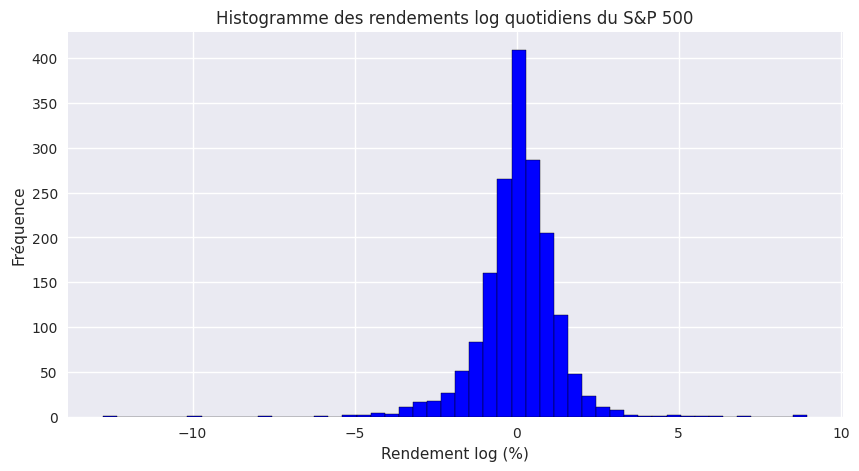

Skewness (asym√©trie) : -0.8156
Kurtosis (applatissement, queues √©paisses) : 14.4213


In [19]:
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

# üîπ Tracer l'histogramme des rendements log
plt.figure(figsize=(10,5))
plt.hist(log_returns, bins=50, color='blue', edgecolor='black')
plt.title("Histogramme des rendements log quotidiens du S&P 500")
plt.xlabel("Rendement log (%)")
plt.ylabel("Fr√©quence")
plt.grid(True)
plt.show()

# üîπ Calculer la kurtosis et la skewness
kurt = kurtosis(log_returns)  # exc√®s de kurtosis (kurtosis > 0 => queues √©paisses)
skw = skew(log_returns)

print(f"Skewness (asym√©trie) : {skw:.4f}")
print(f"Kurtosis (applatissement, queues √©paisses) : {kurt:.4f}")


/tmp/ipykernel_13607/809782255.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['volatility_garch'] = res.conditional_volatility


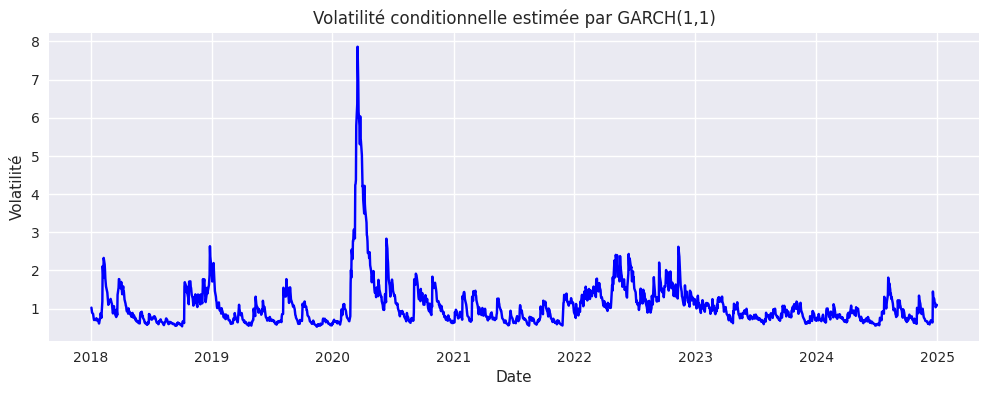

In [21]:
from arch import arch_model

# Ajuster un GARCH(1,1) sur les rendements log
am = arch_model(log_returns, vol='Garch', p=1, q=1)
res = am.fit(disp="off")

# Volatilit√© estim√©e
data_filtered['volatility_garch'] = res.conditional_volatility

# Tracer
plt.figure(figsize=(12,4))
plt.plot(data_filtered.index[1:], data_filtered['volatility_garch'][1:], color='blue')
plt.title("Volatilit√© conditionnelle estim√©e par GARCH(1,1)")
plt.xlabel("Date")
plt.ylabel("Volatilit√©")
plt.grid(True)
plt.show()


In [22]:
from arch import arch_model

# Mod√®le GARCH(1,1) avec distribution Student-t
am = arch_model(log_returns, vol='Garch', p=1, q=1, dist='studentst')
res = am.fit(disp='off')
print(res.summary())

# Volatilit√© estim√©e
data_filtered['volatility_garch'] = res.conditional_volatility


                        Constant Mean - GARCH Model Results                         
Dep. Variable:                   log_return   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -2402.40
Distribution:      Standardized Student's t   AIC:                           4814.80
Method:                  Maximum Likelihood   BIC:                           4842.16
                                              No. Observations:                 1760
Date:                      Mon, Oct 27 2025   Df Residuals:                     1759
Time:                              22:32:00   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu        

/tmp/ipykernel_13607/2106548673.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['volatility_garch'] = res.conditional_volatility


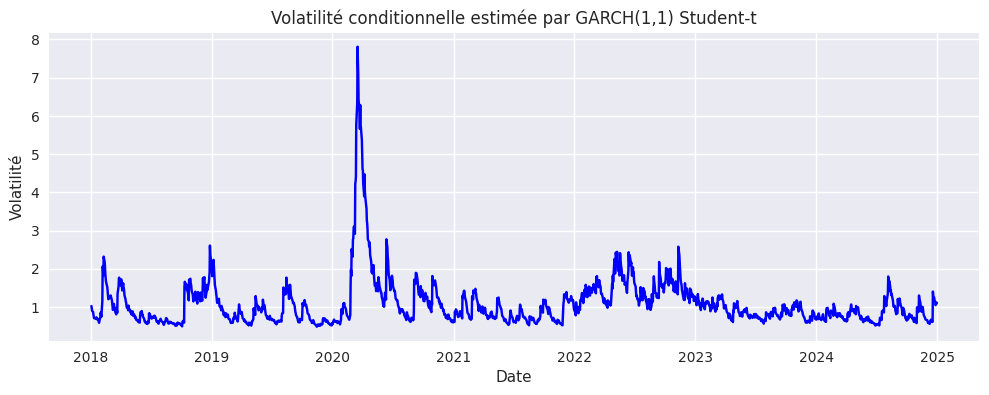

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(data_filtered.index[1:], data_filtered['volatility_garch'][1:], color='blue')
plt.title("Volatilit√© conditionnelle estim√©e par GARCH(1,1) Student-t")
plt.xlabel("Date")
plt.ylabel("Volatilit√©")
plt.grid(True)
plt.show()


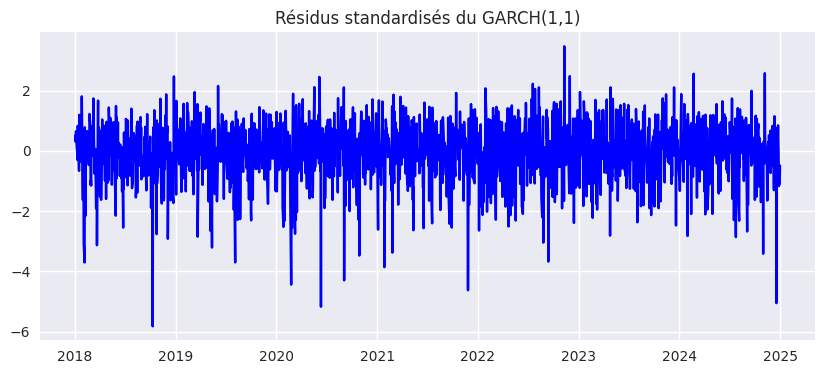

In [26]:
residuals = res.std_resid  # r√©sidus standardis√©s
plt.figure(figsize=(10,4))
plt.plot(residuals, color='blue')
plt.title("R√©sidus standardis√©s du GARCH(1,1)")
plt.grid(True)
plt.show()


In [27]:
from statsmodels.stats.diagnostic import het_arch

arch_test = het_arch(residuals)
print("Test ARCH:", arch_test)


Test ARCH: (np.float64(6.323892995517694), np.float64(0.7873567928649291), 0.6306933882404249, 0.7885813618342967)


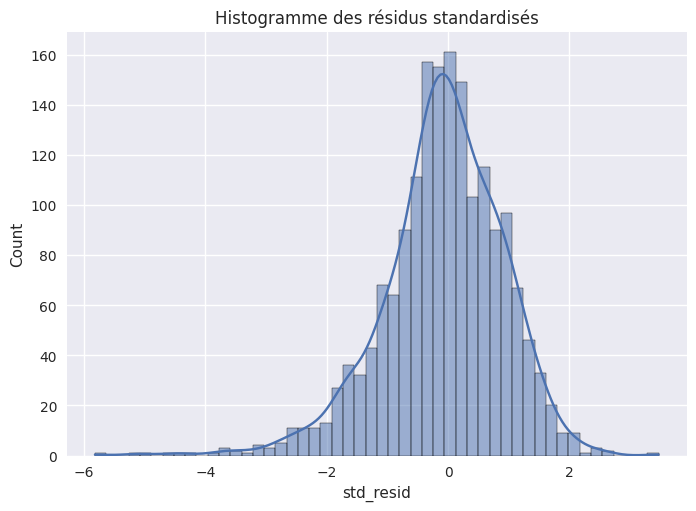

In [28]:
import seaborn as sns
sns.histplot(residuals, bins=50, kde=True)
plt.title("Histogramme des r√©sidus standardis√©s")
plt.show()


GARCH(2,2) Summary:
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                   log_return   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -2401.60
Distribution:      Standardized Student's t   AIC:                           4817.19
Method:                  Maximum Likelihood   BIC:                           4855.50
                                              No. Observations:                 1760
Date:                      Mon, Oct 27 2025   Df Residuals:                     1759
Time:                              22:34:30   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
-----------------------------------------------------------------

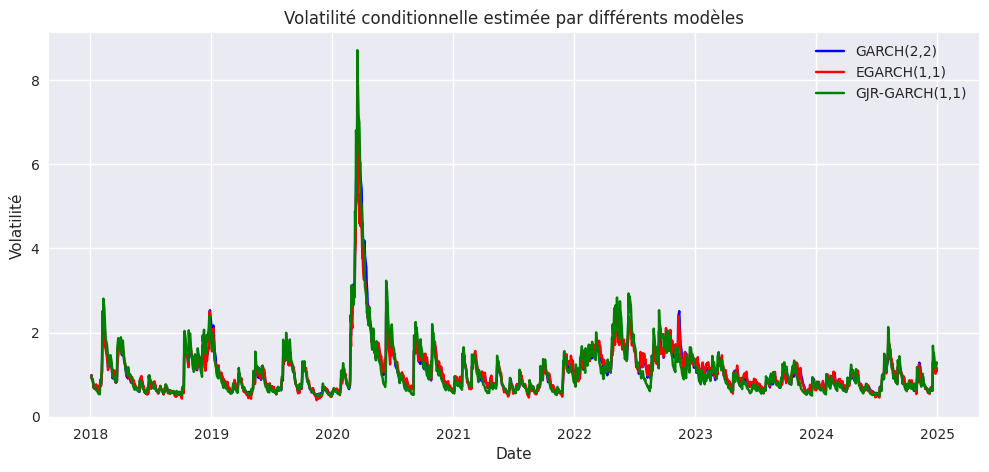

In [29]:
from arch import arch_model
import matplotlib.pyplot as plt

# üîπ GARCH(p,q) avec p=2, q=2
garch_2_2 = arch_model(log_returns, vol='Garch', p=2, q=2, dist='studentst')
res_garch_2_2 = garch_2_2.fit(disp='off')
print("GARCH(2,2) Summary:")
print(res_garch_2_2.summary())

# Volatilit√© estim√©e
vol_garch_2_2 = res_garch_2_2.conditional_volatility

# üîπ EGARCH(1,1)
egarch = arch_model(log_returns, vol='EGARCH', p=1, q=1, dist='studentst')
res_egarch = egarch.fit(disp='off')
print("\nEGARCH(1,1) Summary:")
print(res_egarch.summary())

vol_egarch = res_egarch.conditional_volatility

# üîπ GJR-GARCH (ou TGARCH) 1,1
gjr = arch_model(log_returns, vol='GARCH', p=1, q=1, o=1, dist='studentst')  # o=1 pour le terme asym√©trique
res_gjr = gjr.fit(disp='off')
print("\nGJR-GARCH(1,1) Summary:")
print(res_gjr.summary())

vol_gjr = res_gjr.conditional_volatility

# üîπ Tracer les volatilit√©s estim√©es
plt.figure(figsize=(12,5))
plt.plot(log_returns.index[1:], vol_garch_2_2[1:], label='GARCH(2,2)', color='blue')
plt.plot(log_returns.index[1:], vol_egarch[1:], label='EGARCH(1,1)', color='red')
plt.plot(log_returns.index[1:], vol_gjr[1:], label='GJR-GARCH(1,1)', color='green')
plt.title("Volatilit√© conditionnelle estim√©e par diff√©rents mod√®les")
plt.xlabel("Date")
plt.ylabel("Volatilit√©")
plt.legend()
plt.grid(True)
plt.show()
